In [2]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sys.path.insert(1, '../')
# from SeasonalPlot_Functions import *
from CharacteristicsPlot_Functions import *

def plot_histogram_for_duration(df, variable, duration, duration_variable, ax, bins=25, label=None, color=None, alpha=0.5, density=True):
    # Filter the DataFrame for the specified duration
    duration_data = df[df[duration_variable] == duration]

    # Plot histogram for the specified duration with density normalization
    if not duration_data.empty:
        n, bins_used, patches = ax.hist(duration_data[variable], bins=bins, alpha=alpha, label=label, color=color, edgecolor='black', density=density)
    else:
        pass

    # Set y-axis label to the specific duration bin it refers to
    ax.set_ylabel(f"{duration}hrs", fontsize=10, rotation=0)
    # Remove y-tick labels
    # ax.set_yticks([])

In [3]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

### Get the data

In [4]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics.csv")
present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']
nimrod = pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/NIMROD_30mins/all_events_characteristics.csv")

In [5]:
print(len(future))
print(len(present))
print(len(nimrod))

1285524
1433197
87713


## Plot present vs NIMROD on one plot

In [8]:
bin_edges_intensity = np.arange(0, 70 + 5, 2)
bin_edges_volume = np.arange(0, 135 + 5, 3)
bin_edges_duration = np.arange(0, 60 + 5,1)

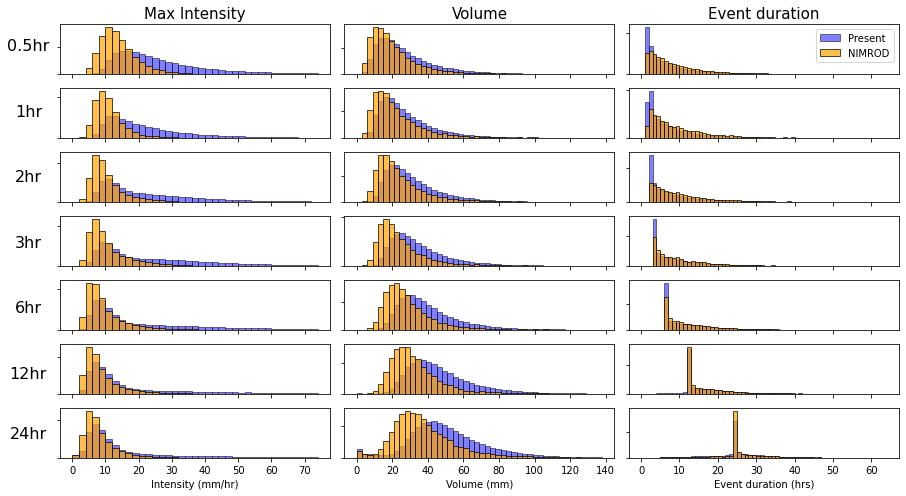

In [11]:
durations = ['0.5', '1', '2', '3', '6','12', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories, n_variables, figsize=(12, 1 * n_categories), sharex='col')  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(present, variable='max_intensity', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='max_intensity', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="NIMROD", color='orange', alpha=0.7)
    
    plot_histogram_for_duration(present, variable='Volume', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='Volume', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="NIMROD", color='orange', alpha=0.7)
        
    plot_histogram_for_duration(present, variable='duration', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='duration', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="NIMROD", color='orange', alpha=0.7)
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Event duration (hrs)", fontsize=10)
        
    axs[0,0].set_title("Max Intensity", fontsize=15)
    axs[0,1].set_title("Volume", fontsize=15)
    axs[0,2].set_title("Event duration", fontsize=15)
    
    axs[0,2].legend(loc='upper right')

for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_ylabel("")

fig.text(-0.02, 0.9, '0.5hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.77, '1hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.64, '2hr', va='center', ha='center', fontsize=16, rotation='horizontal');      
fig.text(-0.02, 0.51, '3hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.38, '6hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.25, '12hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.13, '24hr', va='center', ha='center', fontsize=16, rotation='horizontal');  

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Plot present vs future

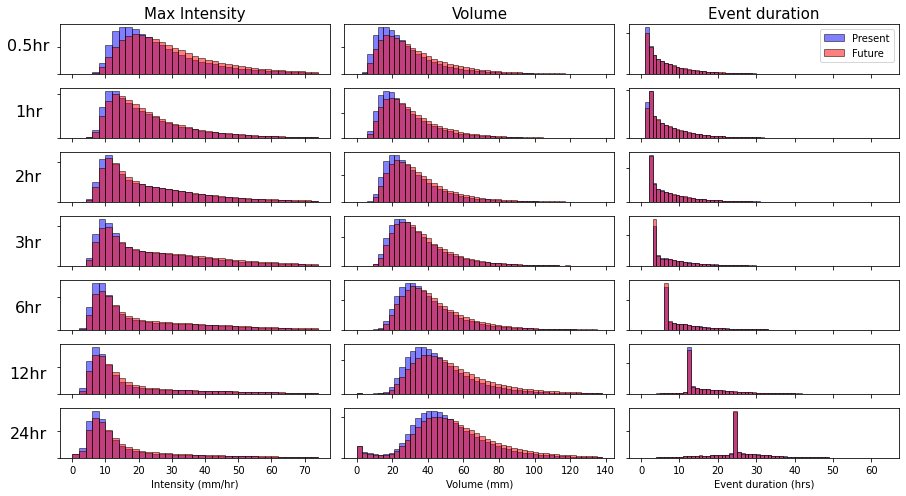

In [53]:
durations = ['0.5', '1', '2', '3', '6','12', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories, n_variables, figsize=(12, 1 * n_categories), sharex='col')  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(present, variable='max_intensity', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='max_intensity', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Future", color='red', alpha=0.5)
    
    plot_histogram_for_duration(present, variable='Volume', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='Volume', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Future", color='red', alpha=0.5)
        
    plot_histogram_for_duration(present, variable='duration', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='duration', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Future", color='red', alpha=0.5)
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Event duration (hrs)", fontsize=10)
        
    axs[0,0].set_title("Max Intensity", fontsize=15)
    axs[0,1].set_title("Volume", fontsize=15)
    axs[0,2].set_title("Event duration", fontsize=15)
    
    axs[0,2].legend(loc='upper right')

for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_ylabel("")

fig.text(-0.02, 0.9, '0.5hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.77, '1hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.64, '2hr', va='center', ha='center', fontsize=16, rotation='horizontal');      
fig.text(-0.02, 0.51, '3hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.38, '6hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.25, '12hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.13, '24hr', va='center', ha='center', fontsize=16, rotation='horizontal');  

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()